In [1]:
#https://pwilmart.github.io/IRS_normalization/understanding_IRS.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
from sklearn.decomposition import PCA
from adjustText import adjust_text
def make_pca(in_df, palette):
    cols = in_df.columns
    pca = PCA(n_components=2)
    pca.fit(in_df)
    temp_df = pd.DataFrame()
    temp_df['pc_1']=pca.components_[0]
    temp_df['pc_2']=pca.components_[1]
    temp_df.index = cols
    print(pca.explained_variance_ratio_)
    temp_df['color']=palette
    fig,ax=plt.subplots(figsize=(16,8))
    temp_df.plot(kind='scatter',x='pc_1',y='pc_2',s=5, c=temp_df['color'], ax=ax)
    #print(temp_df.index.values)
       
    texts = [plt.text(temp_df.iloc[i]['pc_1'], 
                       temp_df.iloc[i]['pc_2'],
                       cols[i])
                       for i in range(temp_df.shape[0])]
    
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    ax.set_title('PCA',size=14)
    ax.set_xlabel('PC1_{:.3f}'.format(pca.explained_variance_ratio_[0]),size=12)
    ax.set_ylabel('PC2_{:.3f}'.format(pca.explained_variance_ratio_[1]),size=12)
    
    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)

    #if not os.path.exists(path+'figs'):  
        #os.makedirs(path+'figs')
    #fig.savefig(path+'figs/pca.svg')
    #fig.savefig(path+'figs/pca.png')
    #fig.savefig(path+'figs/pca.pdf')
    #plt.legend()
    plt.show()

In [3]:
df1 = pd.read_table('Hippocampus_export.csv', sep='\t')
df1.columns = ['Hippo_'+n for n in df1.columns]
print(df1.shape)
df1.head()

(7043, 10)


D:\michele\miniconda3\envs\prediction\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hippo_Protein IDs
0,37382.0,44103.0,43120.0,39512.0,43439.0,34445.0,32882.0,37165.0,37203.0,S4R2S6_MOUSE
1,1458800.0,1533800.0,1416400.0,1378000.0,1522300.0,1216900.0,1085100.0,1490200.0,1312600.0,E9PXY1_MOUSE
2,1276900.0,1345800.0,1226700.0,1125400.0,1316500.0,1008900.0,851180.0,1273000.0,1083300.0,BIG2_MOUSE
3,751950.0,790170.0,693740.0,671740.0,732560.0,575820.0,485000.0,751780.0,636580.0,TANC2_MOUSE
4,280690.0,279700.0,300880.0,335690.0,305910.0,253170.0,280620.0,288580.0,291180.0,F1712_MOUSE


In [4]:
df1[df1['Hippo_Protein IDs'].isin(['E41L1_MOUSE'])]

,Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hippo_Protein IDs
6181,77776.0,69278.0,74622.0,85246.0,82539.0,83851.0,456450.0,496570.0,485760.0,E41L1_MOUSE


In [5]:
import pandas as pd
df2 = pd.read_table('Hypothalamus_export.csv', sep='\t')
df2.columns = ['Hypo_'+n for n in df2.columns]
print(df2.shape)
df2.head()

(7295, 10)


D:\michele\miniconda3\envs\prediction\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_2,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3,Hypo_Protein IDs
0,48229.0,54599.0,37258.0,33234.0,5241.4,70258.0,67197.0,50585.0,50044.0,TM275_MOUSE
1,17337.0,17854.0,15194.0,14568.0,10197.0,17639.0,24198.0,15684.0,19584.0,S4R2S6_MOUSE
2,528110.0,538980.0,451470.0,428220.0,416790.0,505980.0,805400.0,483620.0,591570.0,E9PXY1_MOUSE
3,296380.0,319230.0,264040.0,247620.0,164990.0,301000.0,463390.0,293720.0,345080.0,BIG2_MOUSE
4,7623.7,8644.8,7007.2,6378.0,4035.8,7605.4,12413.0,6262.6,8306.6,SMUF2_MOUSE


In [6]:
df2[df2['Hypo_Protein IDs'].isin(['E41L1_MOUSE'])]

,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_2,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3,Hypo_Protein IDs
6441,55877.0,58881.0,47236.0,56419.0,52416.0,63847.0,606110.0,366010.0,433220.0,E41L1_MOUSE


In [7]:
df = df1.merge(df2, left_on='Hippo_Protein IDs', right_on='Hypo_Protein IDs'  ,how='inner')

In [8]:
print (df.shape)
df.head()
genes = df['Hippo_Protein IDs']
del df['Hippo_Protein IDs'],df['Hypo_Protein IDs']
del df['Hypo_HF_2']

(5570, 20)


In [9]:
groups = ["ND1"]*3+["HF1"]*3+["KO1"]*3+["ND2"]*3+["HF2"]*2+["KO2"]*3

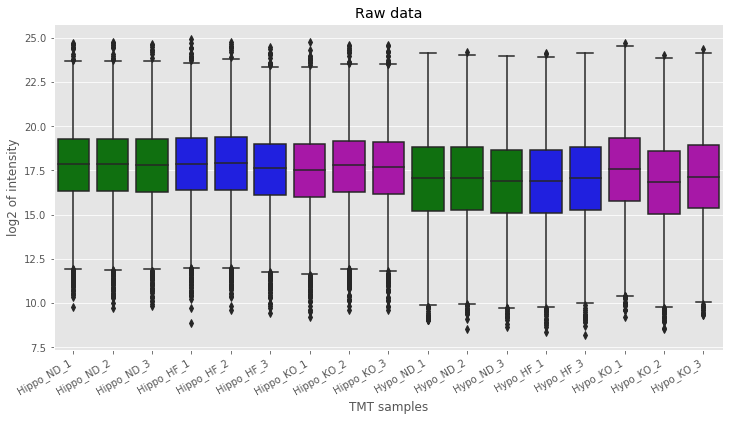

In [10]:
my_pal = ["g"]*3+["b"]*3+["m"]*3+["g"]*3+["b"]*2+["m"]*3
#my_pal=my_pal*2
fig,ax=plt.subplots(figsize=(12,6))
g = sns.boxplot(data=np.log2(df),ax=ax,palette=my_pal)
g.set_xticklabels(df.columns, rotation=30, ha='right')
plt.title('Raw data')
plt.xlabel('TMT samples')
plt.ylabel('log2 of intensity')
plt.show()

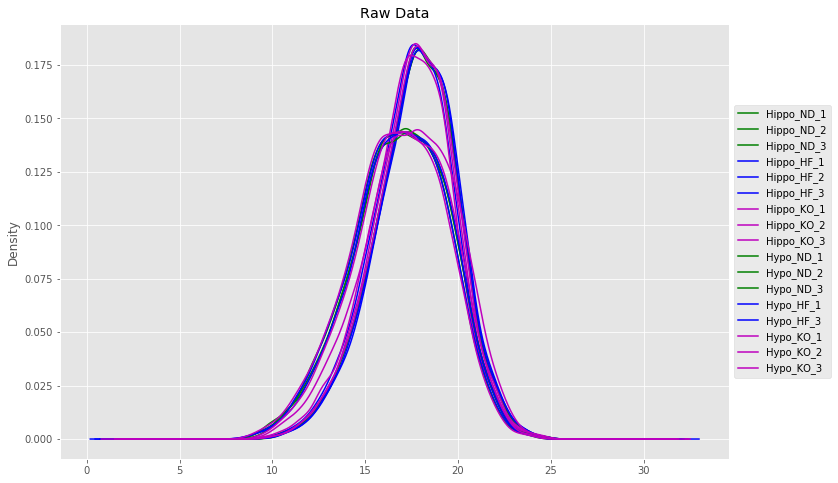

In [11]:
fig,ax=plt.subplots(figsize=(12,8))
np.log2(df).plot(kind='kde',ax=ax,color=my_pal)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Raw Data')
plt.show()

[0.89722301 0.09929023]


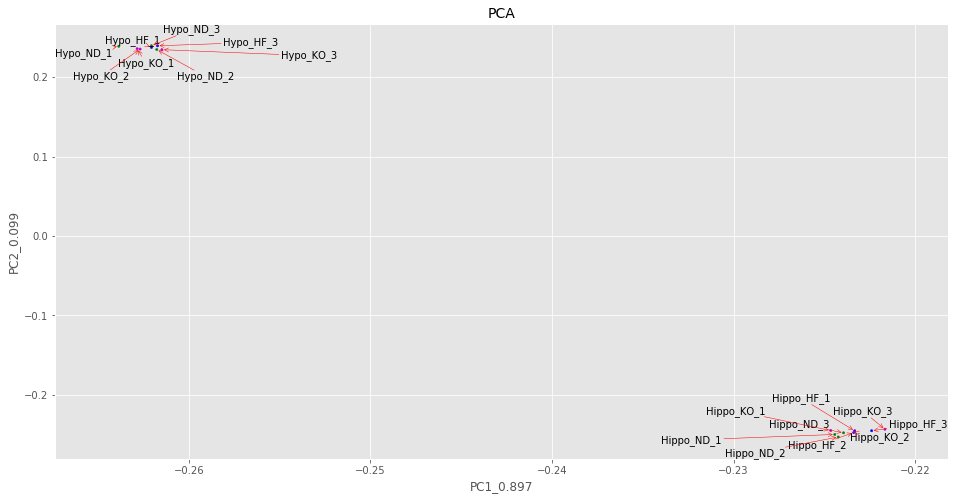

In [12]:
make_pca(np.log2(df), my_pal)

# Strong bias by experiment
modification of ires normalization
### first step: Norm by columns

mean sum intensity 3036702577.7952933


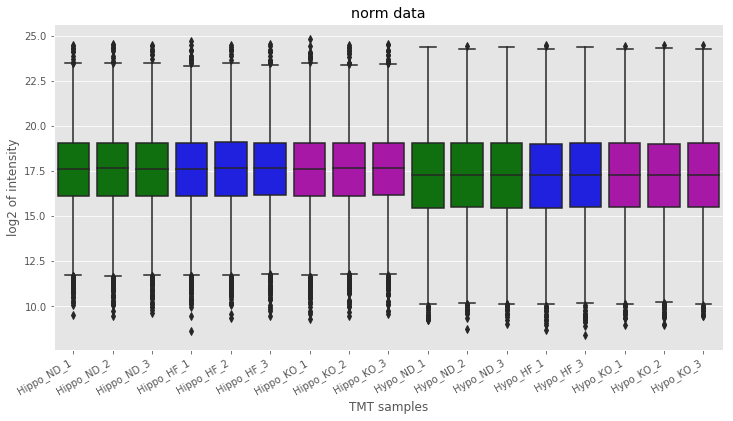

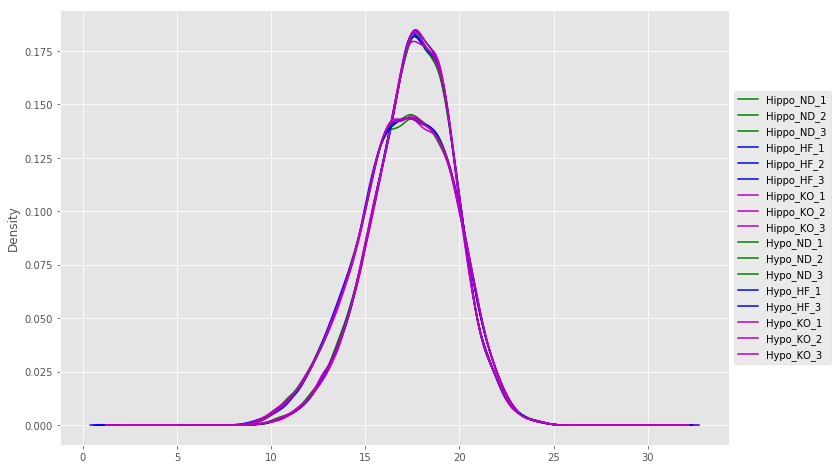

In [13]:
#first: equalize intensity of each column to mean sum intesity of the TMT channels for all experiments
#experiment 1
exp1_raw = df.iloc[:,0:9]
#experiment 1
exp2_raw = df.iloc[:,9:17]
#mean of the sum intensity of all channels
target = np.mean(pd.concat([exp1_raw.sum(axis=0), exp2_raw.sum(axis=0)]))
print('mean sum intensity', target)

#normalization factors for first experiment
norm_facs = target / exp1_raw.sum(axis=0)
exp1_sl = exp1_raw.multiply(norm_facs, axis=1)

#normalization factors for second experiment
norm_facs = target / exp2_raw.sum(axis=0)
exp2_sl = exp2_raw.multiply(norm_facs, axis=1)

#normalized experiment
data_sl =pd.concat([exp1_sl, exp2_sl], axis=1)


fig,ax=plt.subplots(figsize=(12,6))
g = sns.boxplot(data=np.log2(data_sl),ax=ax,palette=my_pal)
g.set_xticklabels(data_sl.columns, rotation=30, ha='right')
plt.title('norm data')
plt.xlabel('TMT samples')
plt.ylabel('log2 of intensity')
plt.show()

fig,ax=plt.subplots(figsize=(12,8))
np.log2(data_sl).plot(kind='kde',ax=ax,color=my_pal)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
### second step: Norm by raw

In [15]:
#mean of the sum intensity of all the proteins in each channel
irs = pd.concat([exp1_sl.sum(axis=1), exp2_sl.sum(axis=1)], axis=1)
irs.columns = ["sum1", "sum2"]
#geometric mean of the sum intensity of all the proteins
irs['average']=np.exp(np.log(irs).mean(axis=1))
#normalization factors for each protein in each dataset
irs['fac1']=irs['average'] / irs['sum1']
irs['fac2']=irs['average'] / irs['sum2']

In [16]:
irs.head()

,sum1,sum2,average,fac1,fac2
0,3.153480e+05,1.617534e+05,2.258509e+05,0.716196,1.396266
1,1.119574e+07,4.909310e+06,7.413728e+06,0.662192,1.510137
2,9.456399e+06,2.871115e+06,5.210605e+06,0.551014,1.814837
3,5.478827e+06,4.726503e+06,5.088781e+06,0.928808,1.076648
4,2.370269e+06,1.067242e+06,1.590487e+06,0.671015,1.490279


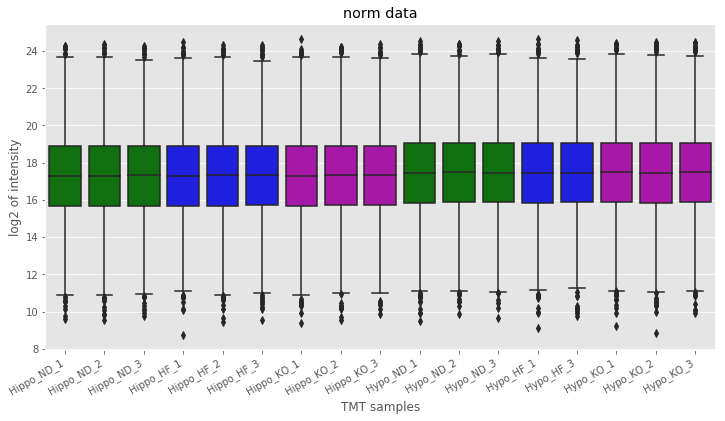

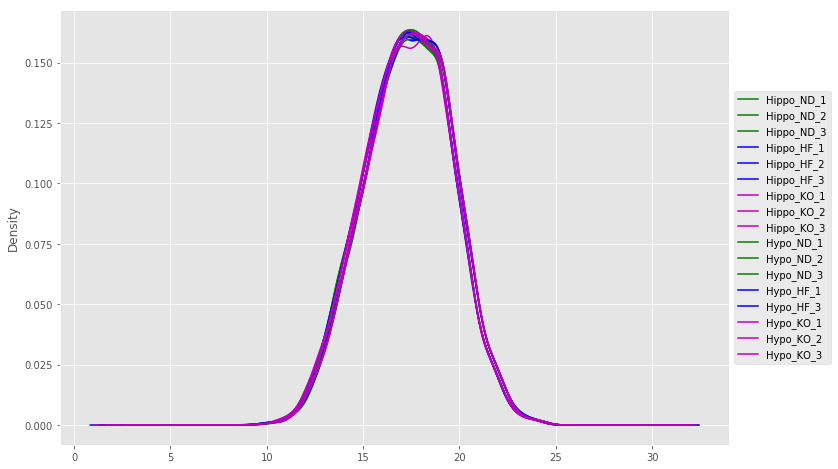

In [17]:
#apply normalization factors for eaqch protein in dataset 1 and 2
data_irs_1 = exp1_sl.multiply(irs.fac1, axis=0)
data_irs_2 = exp2_sl.multiply(irs.fac2, axis=0)
#combine again
data_irs = pd.concat([data_irs_1,data_irs_2],axis=1)

fig,ax=plt.subplots(figsize=(12,6))
g = sns.boxplot(data=np.log2(data_irs),ax=ax,palette=my_pal)
g.set_xticklabels(data_irs.columns, rotation=30, ha='right')
plt.title('norm data')
plt.xlabel('TMT samples')
plt.ylabel('log2 of intensity')
plt.show()

fig,ax=plt.subplots(figsize=(12,8))
np.log2(data_irs).plot(kind='kde',ax=ax,color=my_pal)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

[0.99611156 0.00125309]


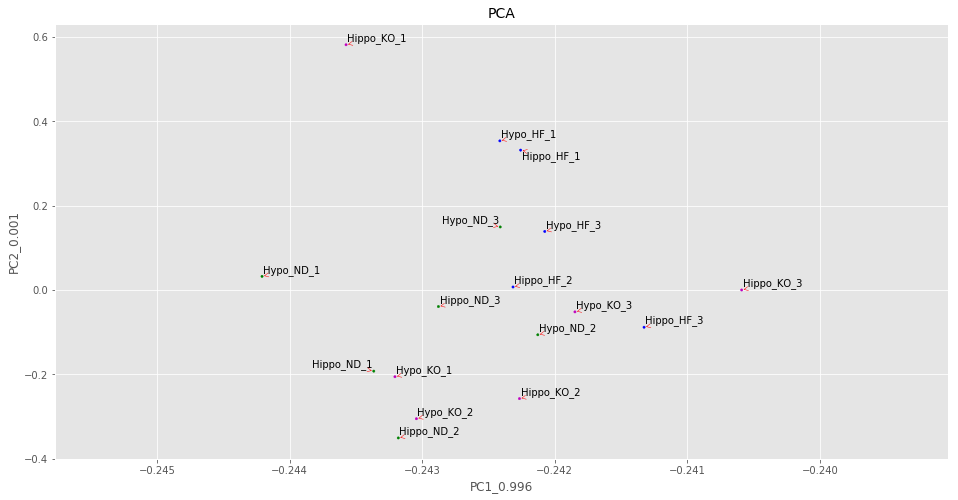

In [18]:
make_pca(np.log2(data_irs), my_pal) 

In [19]:
data_irs.head()

,Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3
0,22750.452267,26826.066851,27175.534073,23638.318930,25388.469946,25270.647672,24983.502266,24067.958265,25749.959770,28134.807764,29125.715583,27617.219361,25717.150069,28511.778432,27681.445751,29535.403058,29527.390024
1,820871.730398,862600.383729,825348.368562,762234.910504,822638.442267,825462.062251,762284.169703,892281.143146,840007.252905,926920.208608,950958.753685,887533.349797,817594.215491,884568.876262,996480.669419,985004.642957,964667.747246
2,597881.404128,629796.222671,594796.437064,517994.493348,591981.630421,569467.525580,497561.950879,634255.400201,576870.051796,625155.763277,676883.790962,623802.188646,568169.567627,632391.735187,689009.637247,718933.846998,676258.586144
3,593486.592430,623309.655203,567009.739410,521174.587942,555257.403495,547862.248915,477893.671809,631379.282696,571407.622562,629524.458516,664549.349861,598720.725148,584439.992582,628719.322345,656330.833435,676336.979526,650159.143050
4,160049.849587,159397.741988,177661.565428,188159.784567,167514.039714,174021.638577,199762.765951,175094.365179,188825.638841,192434.631934,195028.033939,193391.246347,208427.842077,198264.580834,200460.458508,201276.386496,201204.209698


In [22]:
data_irs.join(genes).to_csv('data_irs2.txt',sep='\t',index=False)

cols = ['Hippo_ND_1','Hippo_ND_2','Hippo_ND_3','Hippo_HF_1','Hippo_HF_2','Hippo_HF_3',
       'Hypo_ND_1','Hypo_ND_2','Hypo_ND_3','Hypo_HF_1','Hypo_HF_3',
        'Hypo_KO_1','Hypo_KO_2','Hypo_KO_3','Hippo_KO_1','Hippo_KO_2','Hippo_KO_3']
data_irs[cols].join(genes).to_csv('data_irs2a.txt',sep='\t',index=False)
#moving to r for differential protein expression

In [ ]:
#data_irs_tmm=pd.read_csv('data_irs_tmm.csv')

In [26]:
#constand normalization as described in:
#http://www.mcponline.org/content/15/8/2779 
def constandNormalize(df='', n_channels= 9 ):
    n_channels= n_channels
    
    def compute(X):
        X = X / (n_channels * X.mean())
        return X
        
    def step(df):
        df = df.apply(compute, axis=1)
        error_row = abs(df.mean(axis=0) - (float(1)/n_channels )  ).sum()/2
        df = df.apply(compute, axis=0)
        error_col = abs(df.mean(axis=1) - (float(1)/n_channels )  ).sum()/2
        return df, error_row, error_col
        
    def normalize(df):
        error_col = 1
        error_row = 1
        a=0
        while 1:
            a+=1
            df, error_row, error_col = step(df)
            print (a,error_row, error_col)
            if a >50:
                print ('normalized in',a,'steps')
                return df
            #if (error_row < 1e-5) and (error_col < 1e-5):
            #if ((error_row + error_col)/2 )< 1e-5: 
            if  (error_col < 1e-5):             
                print ('normalized in',a,'steps')
                return df 
    return normalize(df)

In [29]:
df.shape

(5570, 17)

In [30]:
cdf = constandNormalize(df,n_channels=17)

1 0.09969972851593142 9.475811047633528
2 0.014336558404513557 1.4796497030167512
3 0.0022370708572756366 0.23129217608598163
4 0.00034976376281645183 0.03617304309205929
5 5.470384006021206e-05 0.005657811046558183
6 8.556265786396205e-06 0.0008849486756811013
7 1.3383028273604436e-06 0.0001384167703141724
8 2.093269276561005e-07 2.165007940421043e-05
9 3.274129807898096e-08 3.3863379621905387e-06
normalized in 9 steps


In [31]:
cdf.head()

,Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3
0,0.062139,0.073114,0.073671,0.064364,0.068416,0.067811,0.068136,0.064792,0.068764,0.048863,0.050033,0.047372,0.044471,0.048789,0.047497,0.051167,0.050602
1,0.072389,0.075906,0.072240,0.067010,0.071573,0.071516,0.067121,0.077554,0.072425,0.044433,0.045089,0.042019,0.039023,0.041779,0.047193,0.047099,0.045630
2,0.084132,0.088434,0.083073,0.072665,0.082187,0.078728,0.069910,0.087967,0.079366,0.033110,0.035459,0.032630,0.029961,0.033001,0.036053,0.037981,0.035342
3,0.056867,0.059597,0.053925,0.049783,0.052492,0.051574,0.045722,0.059628,0.053531,0.064508,0.067355,0.060594,0.059629,0.063478,0.066446,0.069131,0.065740
4,0.065170,0.064765,0.071801,0.076378,0.067295,0.069615,0.081218,0.070270,0.075173,0.043735,0.043842,0.043410,0.047165,0.044398,0.045012,0.045630,0.045123


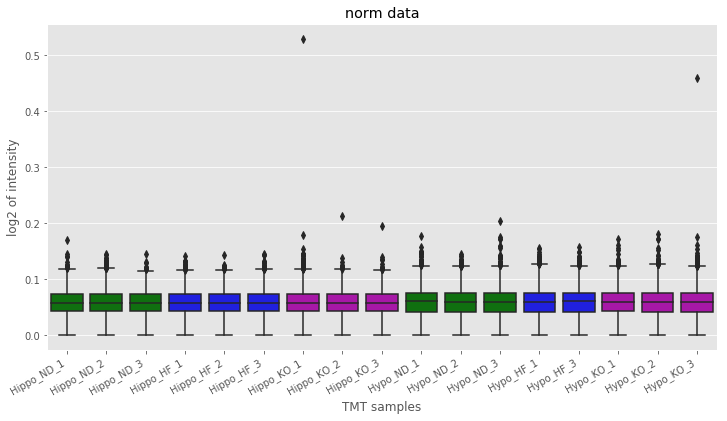

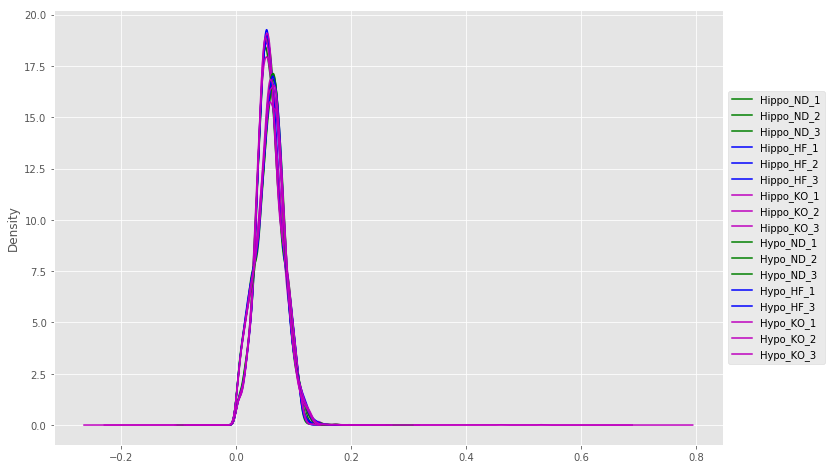

In [34]:
fig,ax=plt.subplots(figsize=(12,6))
g = sns.boxplot(data=cdf,ax=ax,palette=my_pal)
g.set_xticklabels(cdf.columns, rotation=30, ha='right')
plt.title('norm data')
plt.xlabel('TMT samples')
plt.ylabel('log2 of intensity')
plt.show()

fig,ax=plt.subplots(figsize=(12,8))
cdf.plot(kind='kde',ax=ax,color=my_pal)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

[0.82699632 0.14545412]


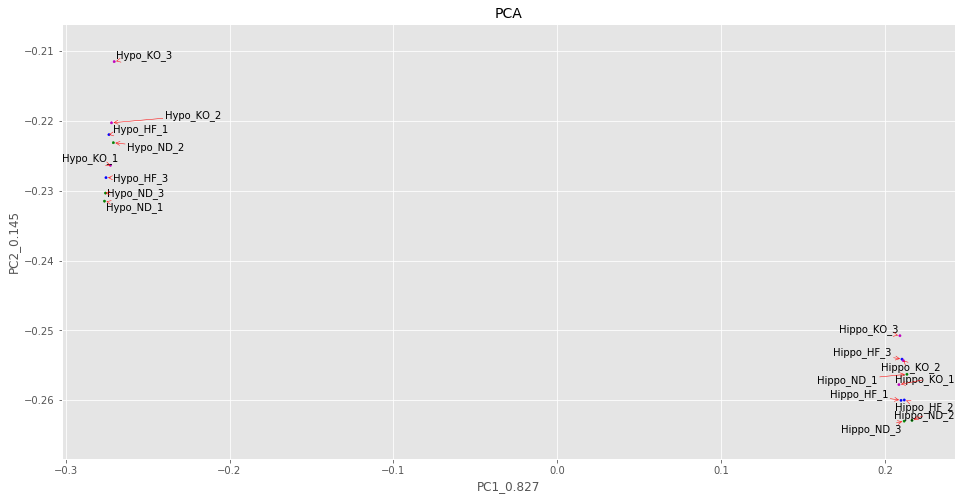

In [36]:
make_pca(np.log2(cdf), my_pal) 

In [38]:
ccdf = df.multiply(cdf)

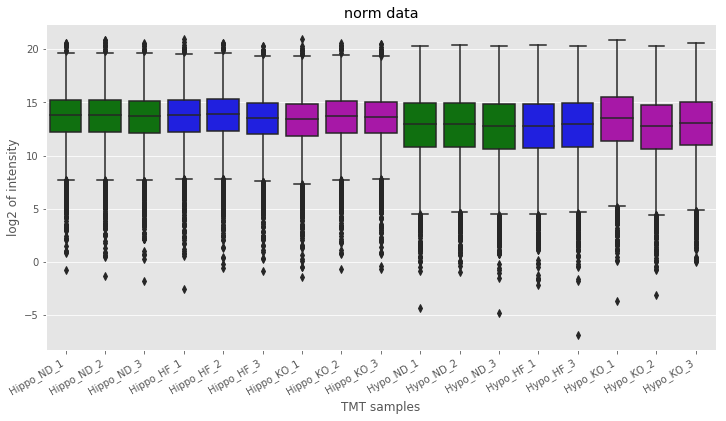

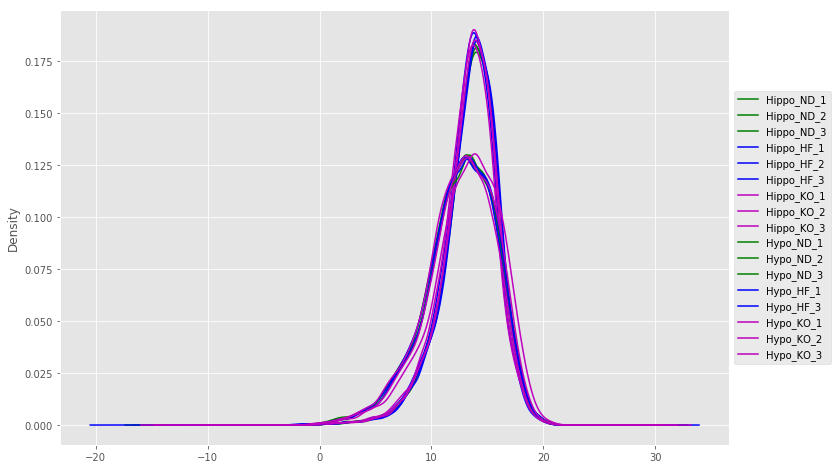

In [40]:
fig,ax=plt.subplots(figsize=(12,6))
g = sns.boxplot(data=np.log2(ccdf),ax=ax,palette=my_pal)
g.set_xticklabels(ccdf.columns, rotation=30, ha='right')
plt.title('norm data')
plt.xlabel('TMT samples')
plt.ylabel('log2 of intensity')
plt.show()

fig,ax=plt.subplots(figsize=(12,8))
np.log2(ccdf).plot(kind='kde',ax=ax,color=my_pal)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

[0.7188661  0.27131985]


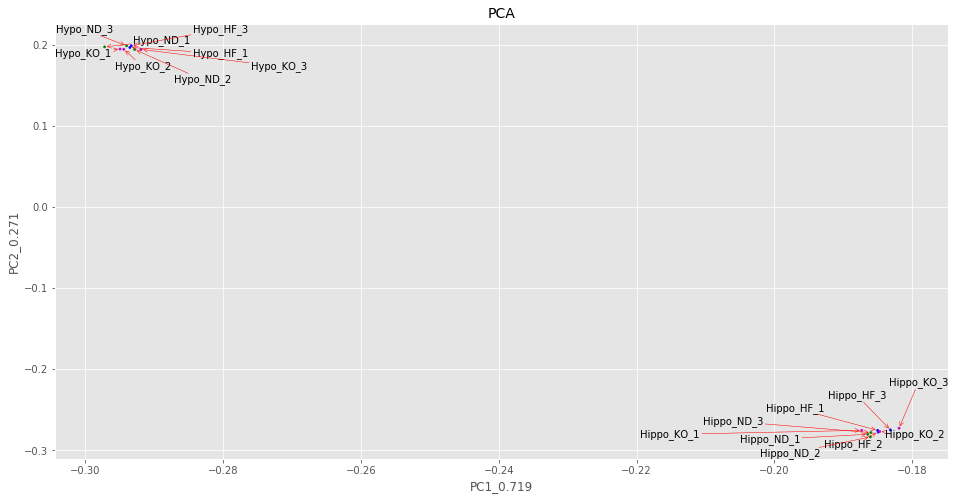

In [41]:
make_pca(np.log2(ccdf), my_pal) 